#### A1 Research Question 

My research questrion is "What are the significant predictors of customer churn in the telecommunications industry, and how do they impact the likelihood of a customer discontinuing service?". This investigation aims to uncover the factors that most strongly influence a customer's decision to leave, thereby enabling the development of targeted strategies to enhance customer retention and minimize churn. By leveraging logistic regression, the study will quantify how various independent variables ranging from customer demographics, service usage patterns, account details and customer satisfaction levels affect the likelihood of churn. This should provide actionable insights for the telecommunications companies to improve their services and retain their customer base.

#### A2 Define the goals of the data analysis 

The primary goal of this data analysis is to identify and quantify the key factors that contribute to customer churn in a telecommunications company. This involves:

* Determining which customer demographics, service usage patterns, and account details (such as tenure, contract type, and monthly charges) are significant predictors of churn.
* Developing a logistic regression model that can accurately predict the probability of churn based on these factors.
    Offering actionable insights to the telecommunications company for developing strategies aimed at improving customer retention.

#### B1 Assumptions of a Logistic Regression

The four assumptions of a logistic regression are:

*    Binary Dependent Variable: Logistic regression requires the dependent variable to be binary. This means it should represent two categories, such as 0 and 1, Yes and No, or True and False.

*    Independence of Observations: The observations should be independent of each other. This means that the outcome of one observation does not influence or predict the outcome of another observation.

*   No Multicollinearity: Logistic regression assumes that there is no high (multicollinearity) among the independent variables. This means that the independent variables should not be too highly correlated with each other.

*   There are No Extreme Outliers: Although logistic regression does not require the independent variables to be linearly related to the dependent variable, it requires the independent variables to be linearly related to the log odds. Logistic regression assumes that there are no extreme outliers or influential observations in the dataset.


(Statology, 2021)

#### B2 Two Benefits of Using Python

* Versatility and Libraries: Python offers a vast array of libraries and tools like Pandas for
data manipulation, NumPy for numerical calculations, Matplotlib and Seaborn for data visualization,
and scikit-learn for implementing machine learning algorithms including linear
regression. I also used scipy for Stats and statsmodels.api to perform Backward Elimination.
This ecosystem makes Python a versatile tool for the entire data analysis process, from data
cleaning to model building and evaluation.

* Ease of Use and Community Support: Python has a relatively gentle learning curve and is
known for its readability and simplicity, making it accessible to a wide range of users, from
beginners to experts. Additionally, Python has a large and active community, providing
extensive resources, documentation, and forums for troubleshooting, which is invaluable for
analytical work and problem-solving.



#### B3 Logistic Regression for Analyzing the Research Question

Logistic regression is a good model for my research question, "What are the significant predictors of customer churn in the telecommunications industry, and how do they impact the likelihood of a customer discontinuing service?" This method excels in dealing with binary outcomes, precisely matching the churn scenario where outcomes are either churn (1) or no churn (0). It adeptly handles multiple predictors—ranging from demographic factors to service usage patterns allowing us to assess their individual and collective impact on churn likelihood. The interpretability of logistic regression results, through the lens of odds ratios, offers actionable insights into how each variable influences customer decisions to leave or stay with the service provider.

Furthermore, with logistic regression's capacity to inform strategic decision making renders it not only statistically appropreaite but, also practically relevant for tackling the research question. By pinpointing the key factors that predict churn, this method directs the telecommunications company towards targeted retention strategies, thereby mitigating churn and enhancing customer satisfaction. This approach not only addresses the statistical aspects of the research question but,  also aligns with the company's broader objective of improving customer retention through data driven insights.

#### C1 Data Cleaning Goals and The Steps Used

To prepare the dataset for Logistic Regression analysis, especially for the research question “What causes customers to churn?”. There
are several key steps in the data preparation process:

Goals:

* Ensure data quality and relevance to the research question.
* Address missing values, outliers, and inconsistencies.

Steps:

* Identifying Missing Values: Check for missing data in key variables (e.g., customer demographics, service usage).
* Handling Missing Data: Decide on strategies like imputation or removal, depending on the extent and nature of missing data.
* Outlier Detection: Identify outliers using statistical methods or visualization. Evaluate their impact and decide whether to keep, transform, or remove them.
* Data Type Correction: Ensure that all variables are in the correct format (e.g., numerical, categorical).
* The categorical datatypes being used for the multiple regression analysis will be “dummied” using one-hot encoding.
* Consistency Check: Verify that data across all variables is consistent, e.g., no negative values in age or usage.

As for the annotated code. Some of the functions will be run to verify that the data is ready for multiple regression analysis, such as info() to make sure that validate the datatypes for each column, value_counts() to check all of the values in a column, or describe() to display summary statistics for a numeric columns.

In [8]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Loading the dataset
df = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D208\Task_2\churn_clean.csv')

# Check data types, number of values and size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### C2 Summary Statistics of Variables

Dependent Variable:


In [9]:
df.Churn.value_counts()

Churn
No     7350
Yes    2650
Name: count, dtype: int64

Independent Variables:

In [10]:
df.Tenure.describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [11]:
df.InternetService.value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [12]:
df.Contract.value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

In [13]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

In [14]:
df.OnlineSecurity.value_counts()

OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64

In [15]:
df.TechSupport.value_counts()

TechSupport
No     6250
Yes    3750
Name: count, dtype: int64

In [16]:
df.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [17]:
df.Gender.value_counts()

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

In [18]:
df.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [19]:
df.PaperlessBilling.value_counts()

PaperlessBilling
Yes    5882
No     4118
Name: count, dtype: int64

In [20]:
df.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [21]:
df.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [22]:
df.StreamingTV.value_counts()

StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64

In [23]:
df.StreamingMovies.value_counts()

StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64

#### Cleaning the Data

The data cleaning process for the regression analysis is crucial to ensure the integrity and relevance of the variables to our research question, which seeks to understand the factors influencing customer churn. The dependent variable in this case is ‘Churn’, and it will be thoroughly examined for accuracy, with any anomalies or outliers assessed for their impact on the analysis as outlined in section C1.

The chosen independent variables for this analysis include ‘Tenure’, ‘Internet Service’, ‘Contract’, ‘Payment Method’, ‘Online Security’, ‘Tech Support’, ‘Age’, ‘Gender’, ‘Income’, ‘Paperless Billing’, ‘Bandwidth Usage’, ‘Streaming TV’, ‘MonthlyCharge’ and ‘Streaming Movies’. These variables are selected for their potential influence on customer churn. The data cleaning process for these variables will involve:

* Checking for Missing Values: Identifying and addressing any missing data to avoid biases in the analysis.
* Outlier Identification and Treatment: Using statistical analysis and visualization to detect outliers and determine their nature. Appropriate actions, such as exclusion, capping, or transformation, will be taken based on the impact of these outliers on the dataset.
* Ensuring Data Consistency: Verifying that all data is consistently formatted and accurately represents the variable it measures. This includes confirming the correct data type for each 7 variable.
* Normalization or Transformation: If necessary, applying normalization or other transformations to meet the assumptions of multiple linear regression, such as linearity and homoscedasticity. By the end of this data cleaning process, the dataset will be robust and ready for multiple linear regression analysis, with ‘MonthlyCharge’ as the dependent variable and the selected independent variables offering insights into customer behavior and preferences.

In [24]:
# Identifying Missing Values

missing_values = df.isnull().sum()

print(missing_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [25]:
# converting 'Churn' from 'Yes'/'No' to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#### C3 Univariate and Bivariate Visualizations

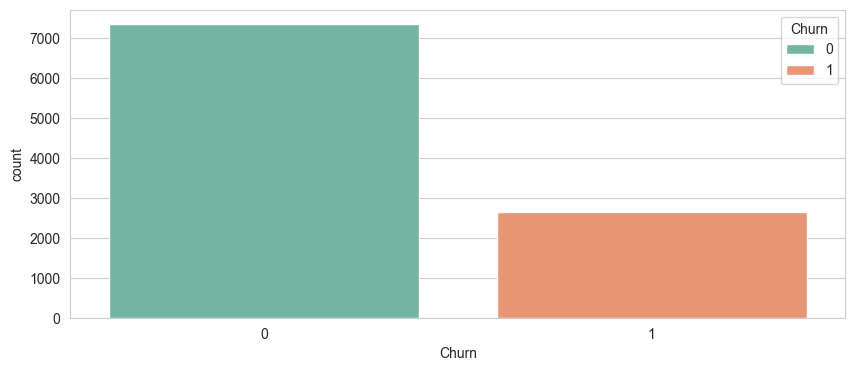

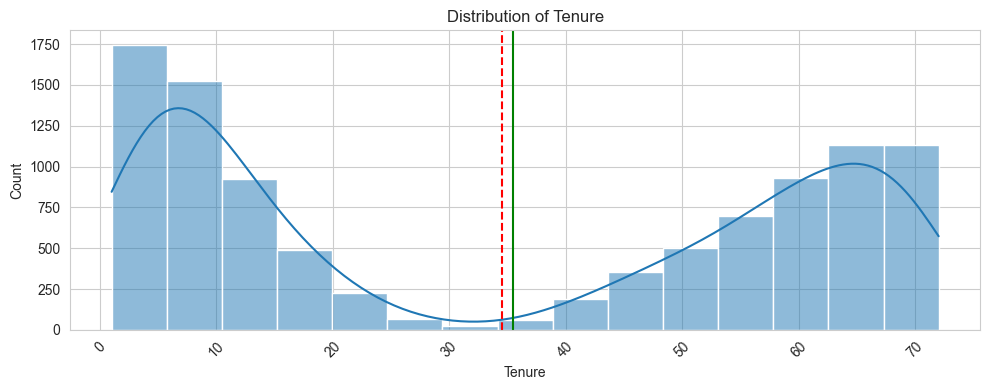

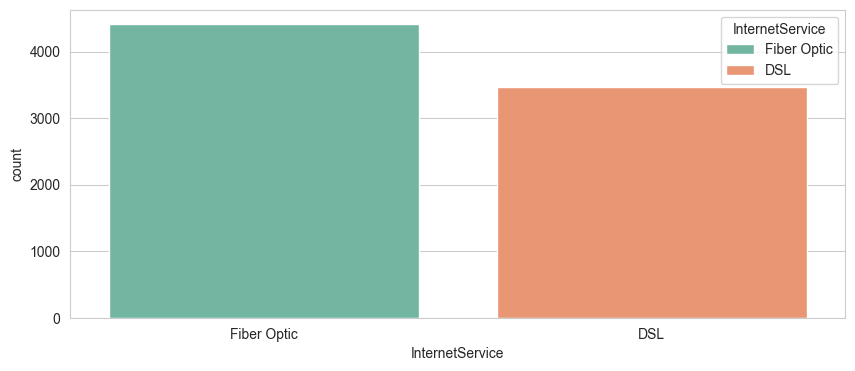

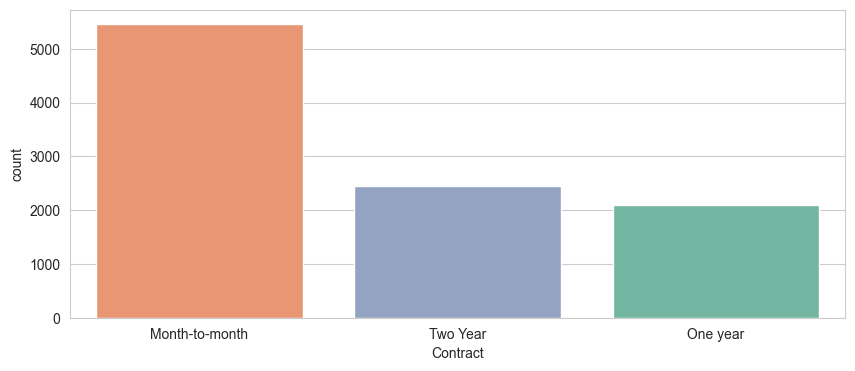

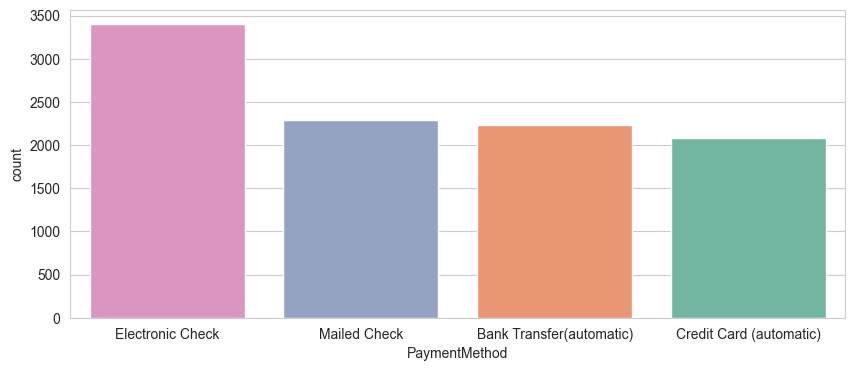

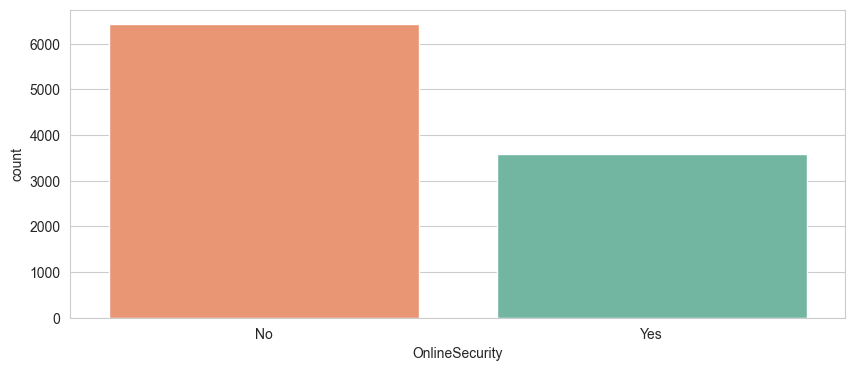

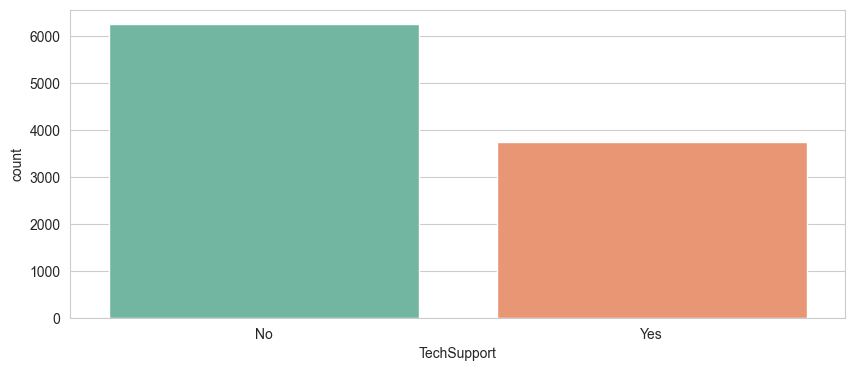

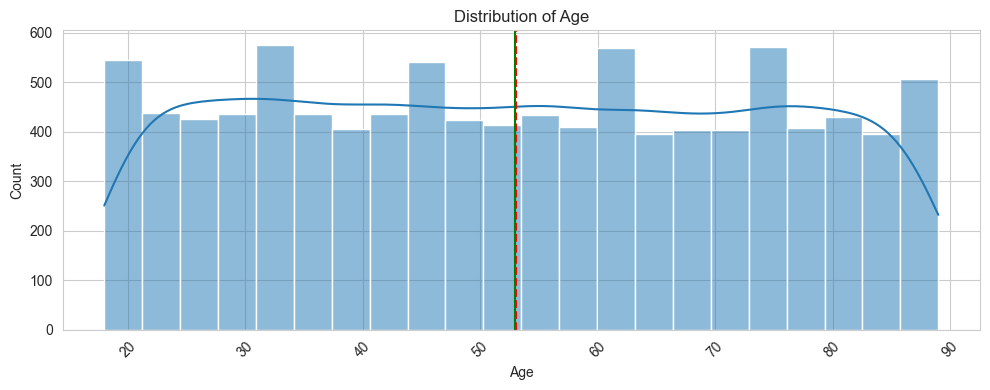

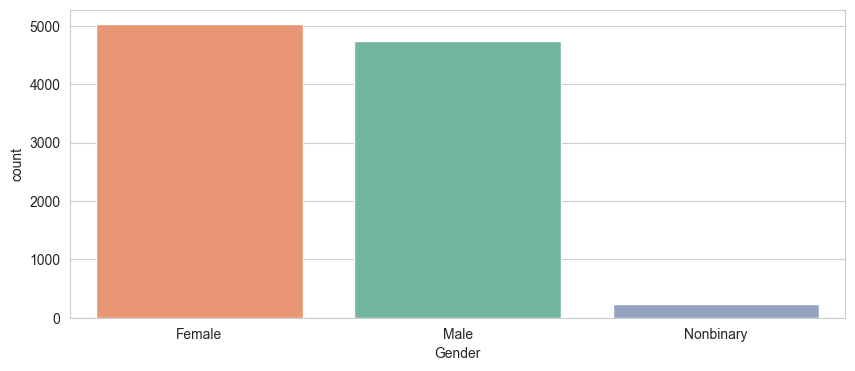

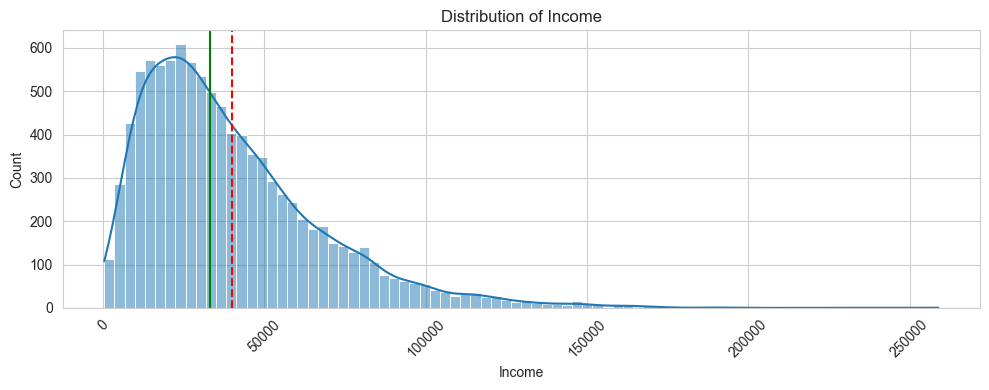

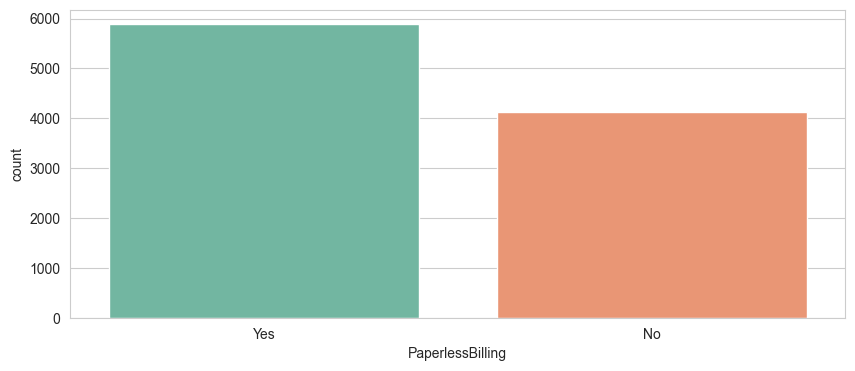

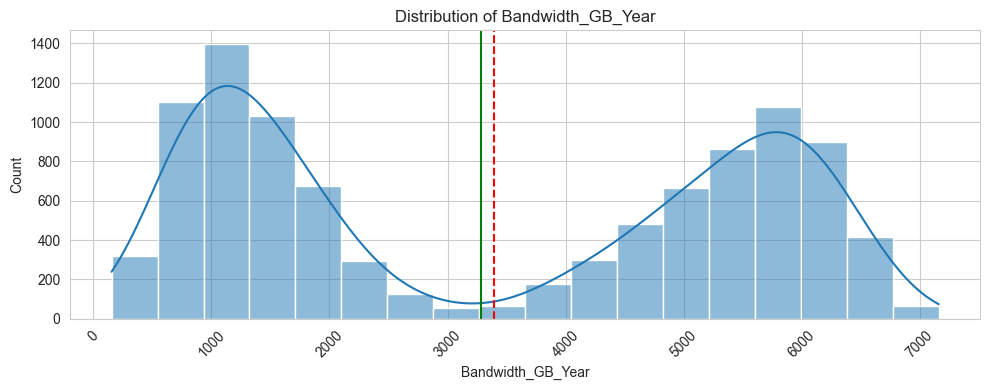

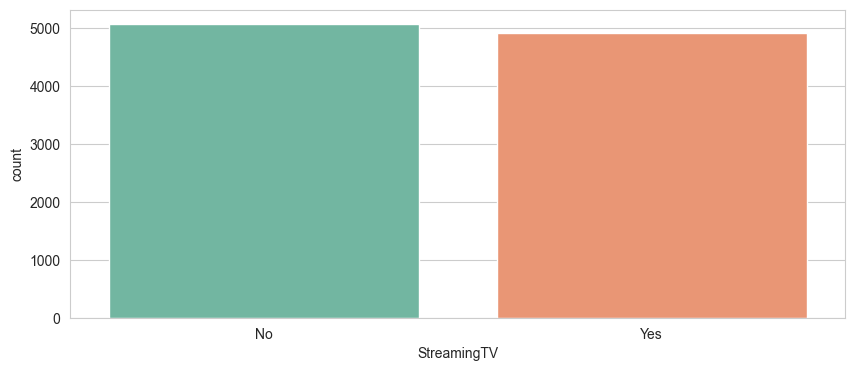

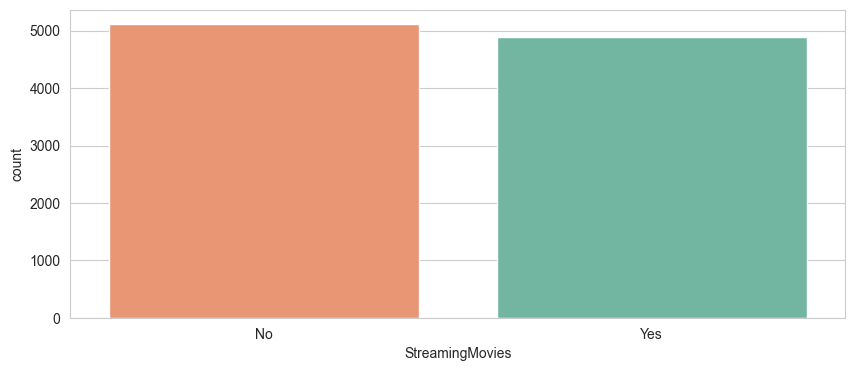

In [26]:
# see attached codes

# my selected variables
selected_variables = ['Churn','Tenure', 'InternetService', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 
                      'Age','Gender', 'Income', 'PaperlessBilling', 'Bandwidth_GB_Year', 'StreamingTV', 'StreamingMovies']


# Filtering the dataset to include only the selected variables
selected_df = df[selected_variables]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Univariate visualizations with enhancements
for column in selected_df.columns:
    plt.figure(figsize=(10, 4))
    if selected_df[column].dtype == 'object' or column == 'Churn':
        # For categorical data with updated count plot code
        sns.countplot(x=column, hue=column, palette='Set2', data=selected_df, order=selected_df[column].value_counts().index)
    else:
        # For numerical data with mean and median lines
        sns.histplot(selected_df[column], kde=True)
        plt.axvline(selected_df[column].mean(), color='r', linestyle='--')
        plt.axvline(selected_df[column].median(), color='g', linestyle='-')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

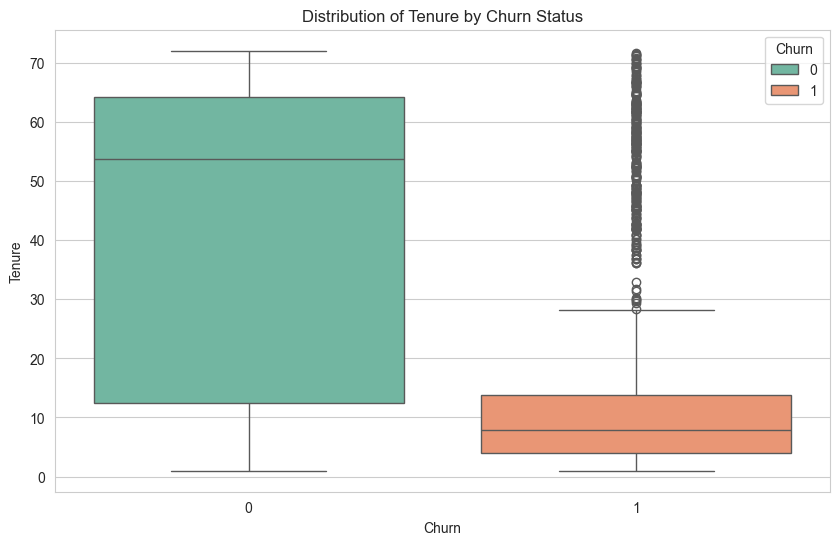

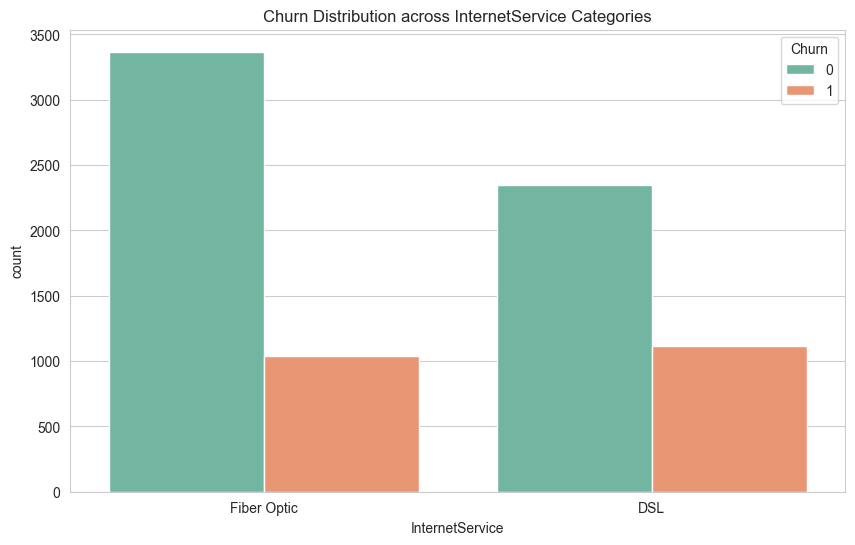

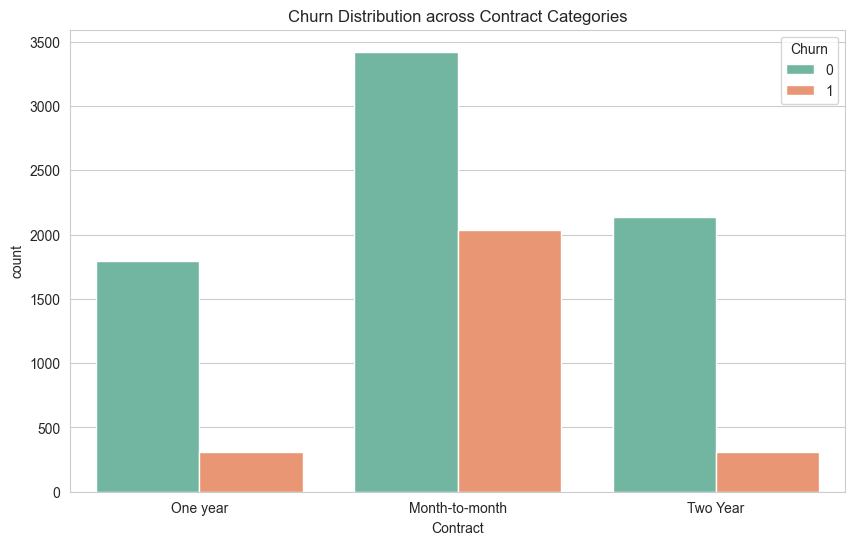

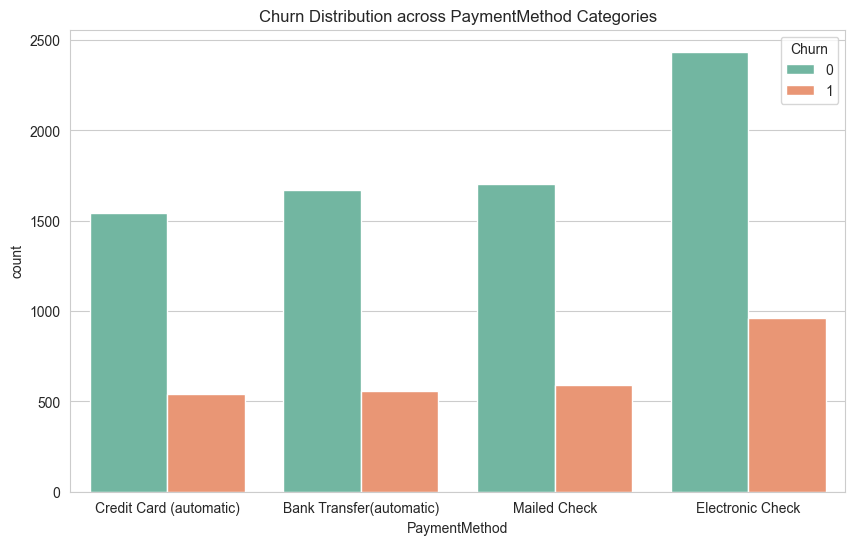

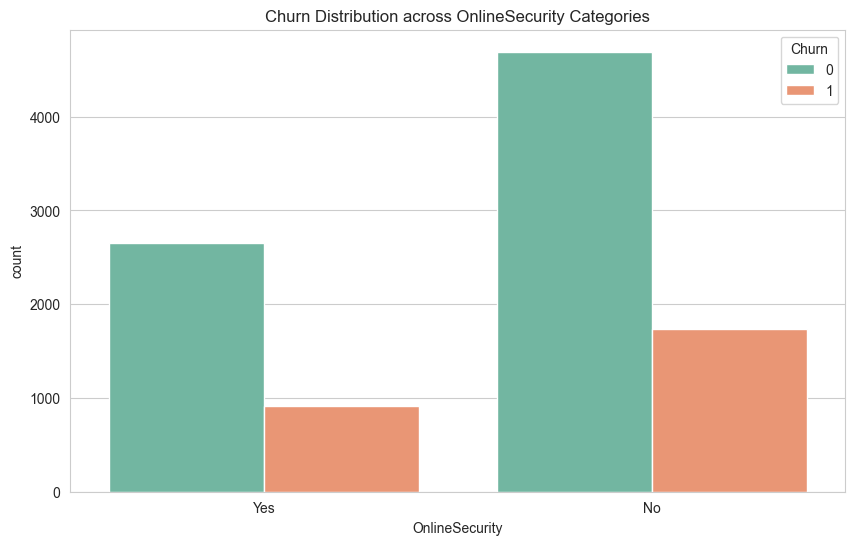

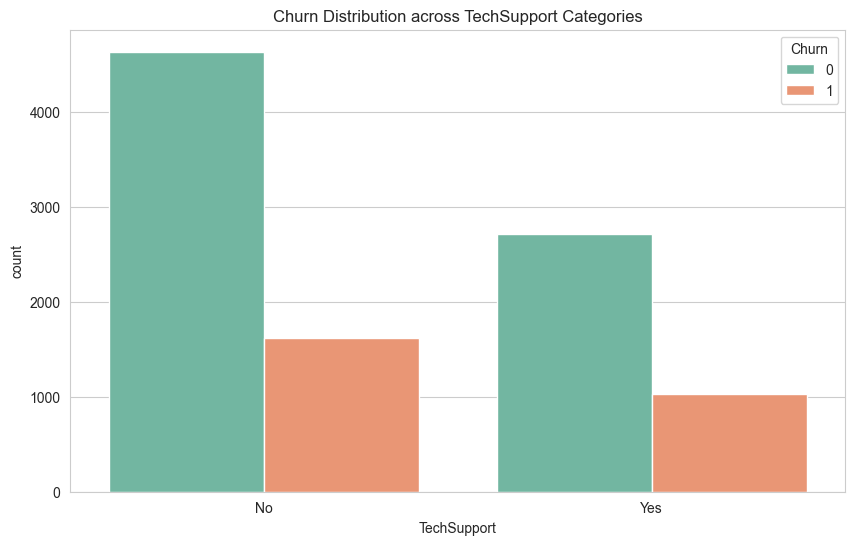

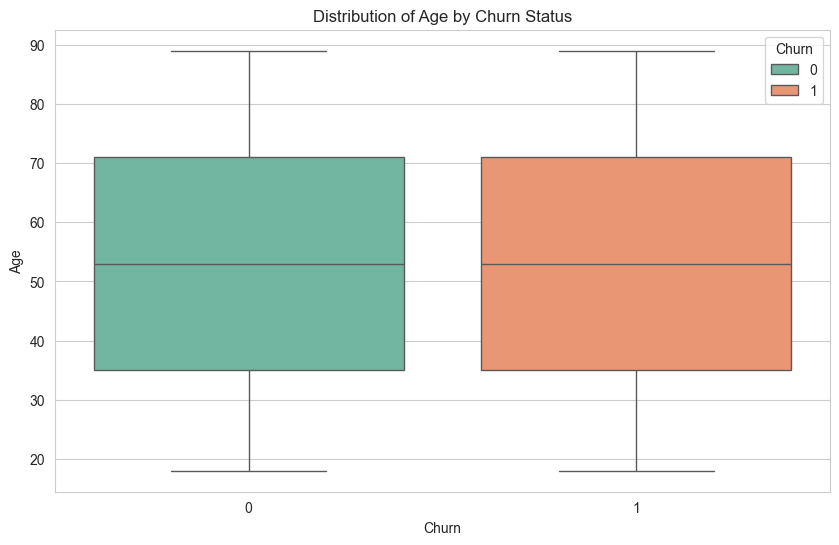

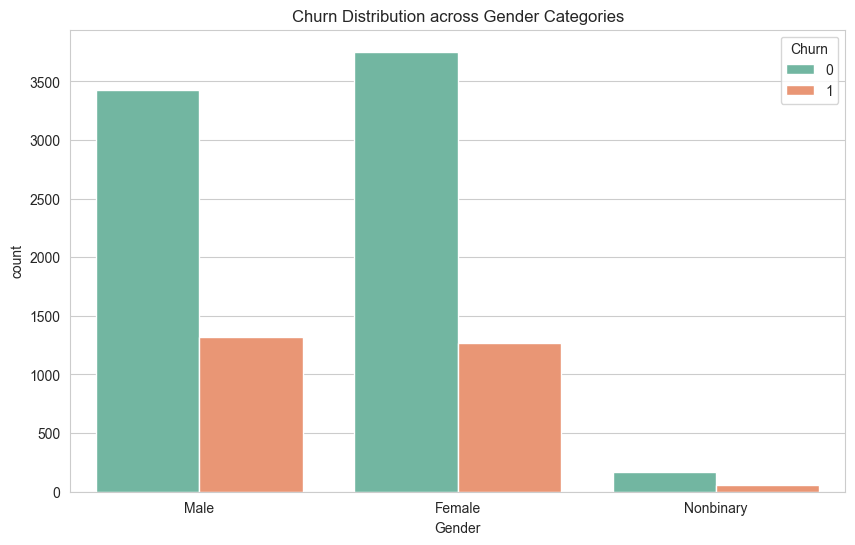

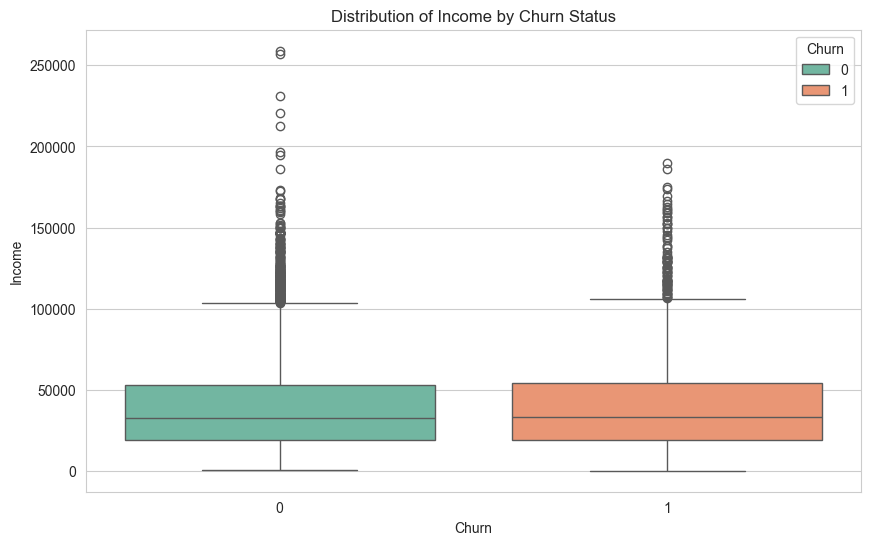

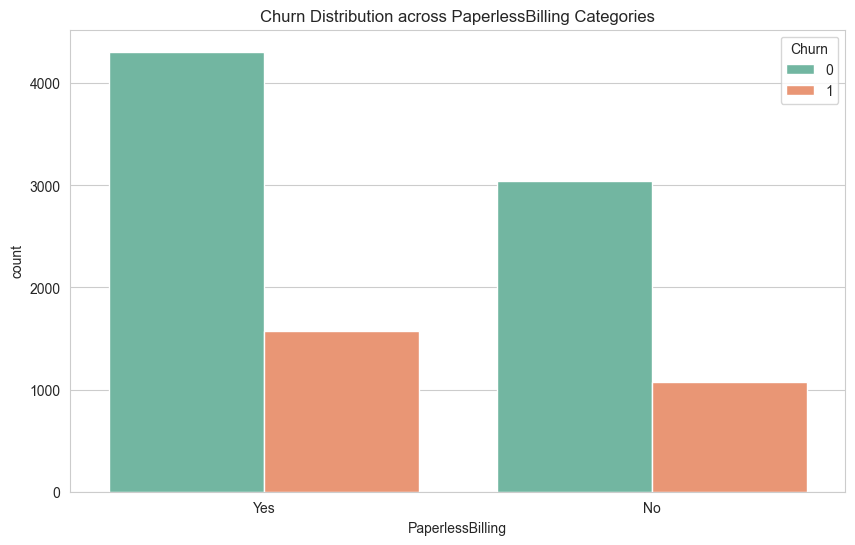

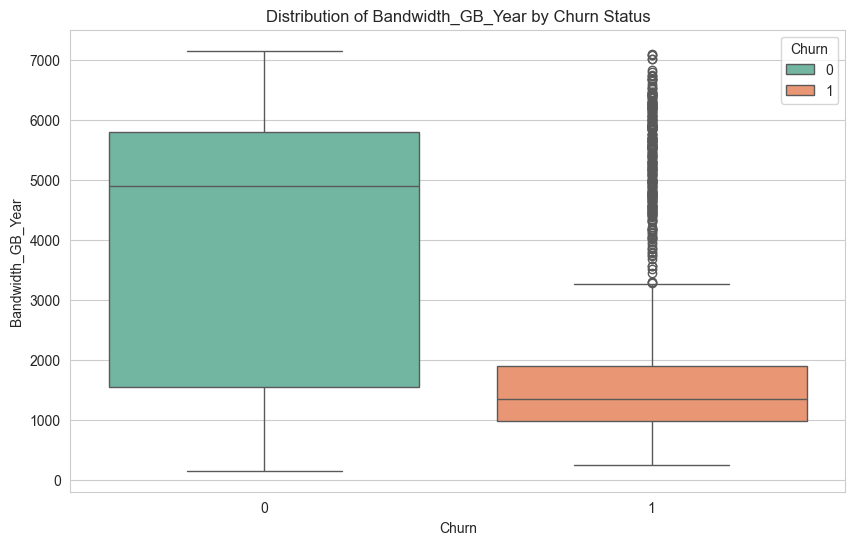

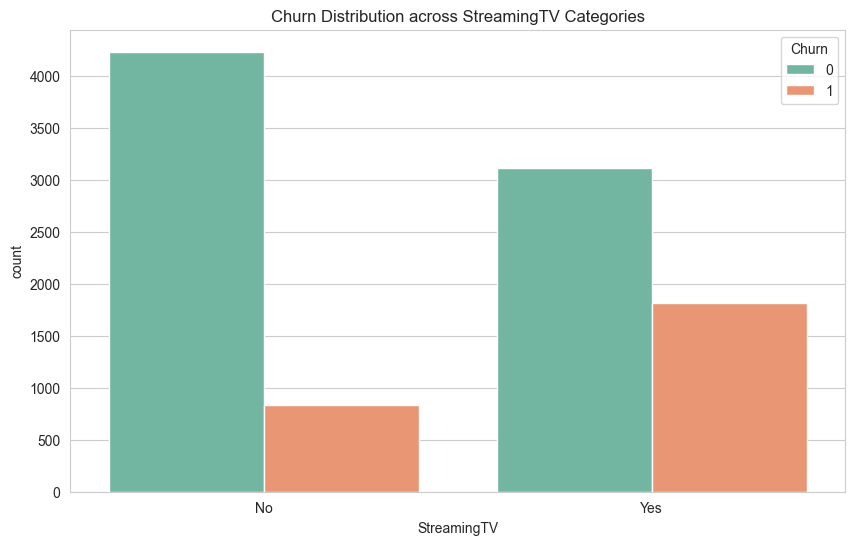

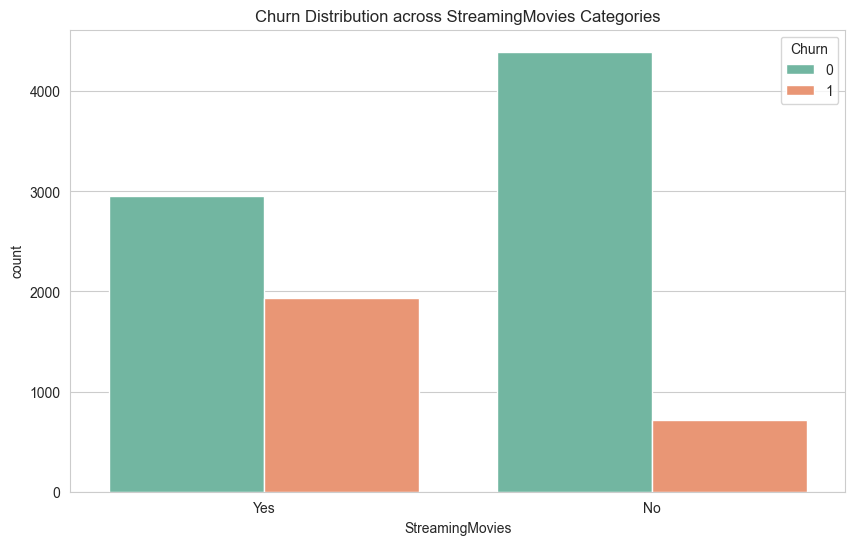

In [27]:
# see attached codes

# Bivariate visualizations adjusted for categorical and numerical variables
for column in selected_variables[1:]: 
    plt.figure(figsize=(10, 6))
    if selected_df[column].dtype == 'object':
        # For categorical data: Adjusted to show the proportion of churn within each category
        sns.countplot(x=column, hue='Churn', data=selected_df, palette='Set2', legend=True)
        plt.title(f'Churn Distribution across {column} Categories')
    else:
        sns.boxplot(y=column, x='Churn', data=selected_df, hue='Churn', palette='Set2', legend=True)
        plt.title(f'Distribution of {column} by Churn Status')
        plt.show()


#### C4 Describe Data Transformation Goals and Steps

* Ensure data quality and relevance to the research question.
* Address missing values, outliers, and inconsistencies.
  
Steps:
* Identifying Missing Values: Check for missing data in key variables (e.g., customer demographics, service usage).
* Handling Missing Data: Decide on strategies like imputation or removal, depending on the extent and nature of missing data.
* Outlier Detection: Identify outliers using statistical methods or visualization. Evaluate their impact and decide whether to keep, transform, or remove them.
* Data Type Correction: Ensure that all variables are in the correct format (e.g., numerical, categorical).
* The categorical datatypes being used for the multiple regression analysis will be “dummied” using one-hot encoding.
* Consistency Check: Verify that data across all variables is consistent, e.g., no negative values in age or usage.

In [28]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [29]:
# Fill missing value in 'InternetService' with 'None'
df['InternetService'].fillna('None', inplace=True)

In [30]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

There are no missing values in this Churn dataset excpet for InternetService which I filled in with
‘None’ above.

Outlier Detection and Handling: The below is use to detect outliers in my chosen variables
‘Age’, ‘Income’, ‘Outage_sec_perweek’, ‘Population’, ‘Yearly_equip_failure’, ‘Tenure’. I retained
only those values within three standard deviations from the mean.

In [31]:
# see attached codes

# Define a function to remove outliers based on z-score where absolute value is less than 3
def remove_outliers(df, column_names):
    # Calculate the z-score for each specified column where the absolute z-score is < 3
    mask = np.column_stack([np.abs(stats.zscore(df[column])) < 3
    for column in column_names])
    return df[mask.all(axis=1)]
    
# Apply the function to the dataframe
numeric_columns = ['Tenure', 'MonthlyCharge', 'Age', 'Income', 'Bandwidth_GB_Year']
df = remove_outliers(df, numeric_columns)

# (Statology zscore, 2021)

* Data Type Correction: The categorical_cols columns was converted to a categorical data
type, which is appropriate for a variable with discrete, non-numeric values. One-Hot Encoding:
I applied one-hot encoding to categorical variables, transforming them into a format
suitable for regression analysis.

In [32]:
# List of categorical variables to one-hot encode
categorical_vars = ['InternetService', 'Contract', 'PaymentMethod','OnlineSecurity','TechSupport', 
                    'Gender', 'PaperlessBilling', 'StreamingTV','StreamingMovies']


# Convert to categorical and apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

* Consistency Check: I ensured data consistency by clipping any negative values in ‘Age’ and
‘Income’ to 0, as negative values in these columns wouldn’t be meaningful.

In [33]:
# Ensure no negative values in my selected independent variables I use .clip method
df['Age'] = df['Age'].clip(lower=0)
df['Income'] = df['Income'].clip(lower=0)
df['Outage_sec_perweek'] = df['Outage_sec_perweek'].clip(lower=0)
df['Population'] = df['Population'].clip(lower=0)
df['Tenure'] = df['Tenure'].clip(lower=0)
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].clip(lower=0)
df['MonthlyCharge'] = df['MonthlyCharge'].clip(lower=0)

In [34]:
bool_cols = ['InternetService_Fiber Optic', 'InternetService_None',
'Contract_One year', 'Contract_Two Year',
'PaymentMethod_Credit Card (automatic)',
'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
'OnlineSecurity_Yes', 'TechSupport_Yes', 'Gender_Male',
'Gender_Nonbinary', 'PaperlessBilling_Yes', 'StreamingTV_Yes',
'StreamingMovies_Yes']

# Convert boolean columns to integers
df[bool_cols] = df[bool_cols].astype(bool).astype(int)

#### C5 Copy Data to CSV file

In [35]:
# Saving the cleaned dataset
cleaned_file_path = (r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D208\Task_2\churn_clean_After.csv')
df.to_csv(cleaned_file_path, index=False)

#### D1 Initial Logistic Regression Model

The initial Logistic Regression model includes all the variables identified in section C2. This model was constructed to predict a binary outcome ('Churn') using logistic regression. The model includes a y-intercept, and the logistic regression is performed using appropriate methods for binary outcomes. This logistic regression model will be refined to address any issues with variables that don't significantly contribute to explaining the dependent variable. 

(Mark Keith’s Machine Learning in Python course materials on YouTube)

(Susan Li's Logistic Regression, 2017)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9855 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CaseOrder                              9855 non-null   int64  
 1   Customer_id                            9855 non-null   object 
 2   Interaction                            9855 non-null   object 
 3   UID                                    9855 non-null   object 
 4   City                                   9855 non-null   object 
 5   State                                  9855 non-null   object 
 6   County                                 9855 non-null   object 
 7   Zip                                    9855 non-null   int64  
 8   Lat                                    9855 non-null   float64
 9   Lng                                    9855 non-null   float64
 10  Population                             9855 non-null   int64  
 11  Area     

In [37]:
# Initial model for Logistic Regression

# Set dependent variable
y = df.Churn
# Set multiple independent variables
X = df[["Tenure", "InternetService_None", "Contract_One year", "Contract_Two Year", "PaymentMethod_Credit Card (automatic)", 
        "PaymentMethod_Electronic Check", "OnlineSecurity_Yes", "TechSupport_Yes","Age", "Gender_Male", "Gender_Nonbinary", "Income", 
        "PaperlessBilling_Yes", "Bandwidth_GB_Year", "MonthlyCharge", "StreamingTV_Yes", "StreamingMovies_Yes"]].assign(const=1)
model = sm.Logit(y, X)
results = model.fit()

print(results.summary())

# (WGU Courseware Resources 2024)

Optimization terminated successfully.
         Current function value: 0.229135
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9855
Model:                          Logit   Df Residuals:                     9837
Method:                           MLE   Df Model:                           17
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                  0.6030
Time:                        18:01:20   Log-Likelihood:                -2258.1
converged:                       True   LL-Null:                       -5688.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                   -0.4357      

#### D2 Reduction Justification

In addressing my research question, ‘What are the significant predictors of customer churn in the telecommunications industry, and how do they impact the likelihood of a customer discontinuing service?’. It’s important to refine my model for accuracy and reliability. I will use Variance Inflation Factor (VIF) analysis and Backward Elimination to strategically towards this issue. VIF analysis identifies and mitigates multicollinearity among predictors by flagging variables with a VIF > 5, a threshold indicating significant multicollinearity. This ensures each variables contributes unique information to the model. This step directly supports my objective by enhancing the model’s clarity and the validity of its findings. It’s crucial for isolating the true impact of each predictor on customer churn and monthly charges.

Following the mitigation of multicollinearity, Backward Elimination further refines the model by iteratively removing predictors that do not significantly influence the dependent variable, as determined by a p-value threshold of 0.05. This systematic reduction focuses the analysis on statistically significant variables, streamlining the model to highlight the most impactful factors affecting customer behavior. The integration of these techniques results in a more robust and focused model. This will accurately reflects the dynamics of the variables and offer actionable insights into reducing customer churn by addressing key influencing factors.

(WGU Course Videos 2024)

In [38]:
# see attached codes

# Step 1: VIF Analysis to Address Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm 

# Assigning the dataframe variables for VIF analysis
df_variables = ['Tenure', 'Age', 'Income', 'Bandwidth_GB_Year','InternetService_Fiber Optic', 'InternetService_None',
                'Contract_One year', 'Contract_Two Year', 'PaymentMethod_Credit Card (automatic)', 
                'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check','OnlineSecurity_Yes', 
                'TechSupport_Yes', 'Gender_Male','Gender_Nonbinary', 'PaperlessBilling_Yes', 'StreamingTV_Yes','StreamingMovies_Yes']

# Creating DataFrame for the features and adding a constant for VIF calculation
X = df[df_variables]
X = sm.add_constant(X)

# Calculating VIF for each feature to identify multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# (WGU Courseware Resources 2024)

                                  Feature         VIF
0                                   const   75.627740
1                                  Tenure  457.599415
2                                     Age    1.466046
3                                  Income    1.002007
4                       Bandwidth_GB_Year  465.076686
5             InternetService_Fiber Optic    5.379081
6                    InternetService_None    4.082314
7                       Contract_One year    1.096505
8                       Contract_Two Year    1.096427
9   PaymentMethod_Credit Card (automatic)    1.531447
10         PaymentMethod_Electronic Check    1.665752
11             PaymentMethod_Mailed Check    1.564335
12                     OnlineSecurity_Yes    1.140805
13                        TechSupport_Yes    1.002001
14                            Gender_Male    1.128449
15                       Gender_Nonbinary    1.023644
16                   PaperlessBilling_Yes    1.001993
17                        St

#### D3 Reduced Logistic Regression Model

In [39]:
# see attached codes

# Step 2: Backward Elimination to Refine the Model
def backward_elimination(X, y, threshold=0.05):
    # Iteratively remove variables with the highest p-value above threshold
    while True:
        model = sm.Logit(y, X).fit(disp=0)
        p_values = model.pvalues.iloc[1:] # Exclude intercept
        max_p = max(p_values)
        feature_with_max_p = p_values.idxmax()
        if max_p > threshold:
            X = X.drop(feature_with_max_p, axis=1)
        else:
            break
    return X
    
# Applying backward elimination with a p-value threshold of 0.05
X_reduced = backward_elimination(X, y)
model_reduced_result = sm.Logit(y, X_reduced).fit()

# print reduced model
print(f"Reduced Model: \n", model_reduced_result.summary(), "\n")

# print original model for comparison
print("\n", f"Original Model: \n", results.summary())

# (WGU Course Videos 2024)
# (Susan Li's Logistic Regression, 2017)

Optimization terminated successfully.
         Current function value: 0.243719
         Iterations 8
Reduced Model: 
                            Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9855
Model:                          Logit   Df Residuals:                     9841
Method:                           MLE   Df Model:                           13
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                  0.5778
Time:                        18:02:52   Log-Likelihood:                -2401.9
converged:                       True   LL-Null:                       -5688.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.5456      0.31

The results of my logistic regression analysis show that both models achieved the same level of fit, as evidenced by the Pseudo R-squared value (0.5778) in the reduced model compare to the original model (0.6030). The reduced model, with 4 less predictors, shows that simplification did not compromise the model's predictive ability.

Key takeaways from the reduced model include:

Reduced Model:

*    Model Performance: The pseudo R-squared for the reduced model is 0.5782, which suggests that the model explains a significant portion of the variance in the churn outcome. However, it is slightly lower than the original model's pseudo R-squared of 0.6034, indicating a minor trade-off in explanatory power for model simplicity.
*    Significant Variables: Almost all variables in the reduced model are significant (P < 0.05), with the exception of Gender_Male, which is right on the threshold of significance. This indicates that the backward elimination successfully retained variables that have a meaningful impact on predicting churn.
*    Interpretation: Coefficients for variables like Tenure, Bandwidth_GB_Year, Contract_One year, and Contract_Two Year are notably impactful, each carrying strong weight in influencing the likelihood of churn.

Original Model:

*   Model Complexity: The original model includes more variables, with a total of 17 predictors compared to 13 in the reduced model. This additional complexity yields a slightly higher pseudo R-squared value, suggesting a more nuanced model but at the potential cost of overfitting or reduced interpretability.
*   Significance of Variables: Some variables, such as Gender_Nonbinary, Income, and PaperlessBilling_Yes, show higher p-values, indicating they are less significant in predicting churn. The backward elimination process seems to have effectively removed variables that do not significantly contribute to the model.


#### E1 Analysis of Logistic Regression

In my analysis of customer churn using logistic regression, two models were evaluated. An initial comprehensive model and a reduced model achieved through backward elimination. The initial model got a pseudo R-squared of 0.6030, indicative of the model's explanatory power regarding the variance in churn. Notably, variables such as Tenure and Bandwidth_GB_Year demonstrated significant impacts on churn. Their p-values registering as 0.000, suggesting their strong association with the likelihood of churn. Despite its complexity some variables in the initial model showed less statistical significance, hinting at potential redundancies within the predictor set.

The reduced logistic regression model was refined to focus on statistically significant predictors. It presented a slightly lower pseudo R-squared of 0.5778, but maintained substantial explanatory power with fewer variables. This simplification not only enhanced model interpretability, but also focused attention on the most impactful predictors of churn. The backward elimination process effectively identified and retained key variables such as Tenure, Bandwidth_GB_Year, InternetService_Fiber Optic, and various contract types, each of which significantly contributes to predicting customer churn. The presence of 0.000 p-values for Tenure and Bandwidth_GB_Year in the reduced model underscores their critical role in the model, affirming their association with churn. By comparing these models, the analysis underscores the value of model simplification in enhancing interpretability and focus, without substantially compromising the model's ability to explain customer churn behavior.

#### E2 Confusion Matrix and Accuracy Calculation

In [40]:
# see attached codes


import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# First split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the reduced model
X_reduced = backward_elimination(X_train, y_train)
model_reduced = sm.Logit(y_train, X_reduced)
results_reduced = model_reduced.fit(disp=0)

# Generate predictions for the test set
predictions = (results_reduced.predict(sm.add_constant(X_test[X_reduced.columns])) >= 0.5).astype(int)


# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# (Confusion-Matrix 2024)
# (Susan Li at Towards Data Science 2017)

Confusion Matrix:
 [[1337  114]
 [ 111  409]]
Accuracy: 0.8858447488584474


* True Negatives (TN): 1337 - The model correctly predicted the negative class (no churn) 1337 times.
* False Positives (FP): 114 - The model incorrectly predicted churn when the actual class was no churn 114 times.
* False Negatives (FN): 111 - The model incorrectly predicted no churn when the actual class was churn 111 times.
* True Positives (TP): 409 - The model correctly predicted churn 409 times.
* Accuracy: 0.8858447488584474 (or approximately 88.58%)

#### E3 A Executable Error-Free copy of The Code Used
I will provided in a ipynb file call ‘Logistic Regression Modeling.ipynb’ in my submission.

#### F1 Results of Data Analysis

The analysis of customer churn in the telecommunications industry, using logistic regression, resulted in a refined, reduced model that maintained strong predictive capability while focusing on the most significant predictors. The regression equation for the reduced model, based on the statistically significant variables identified, can be represented as:

log(1−P(Churn=1)P(Churn=1)​)=−4.5587−0.5843×Tenure+0.0204×Age+0.0059×Bandwidth_GB_Year+1.1727×InternetService_Fiber Optic+1.0166×InternetService_None−2.9756×Contract_One year−3.0990×Contract_Two Year+0.3651×PaymentMethod_Electronic Check−0.5954×OnlineSecurity_Yes+0.2336×TechSupport_Yes−0.1513×Gender_Male+1.2921×StreamingTV_Yes+1.8924×StreamingMovies_Yes

where P(Churn=1)P(Churn=1) is the probability of a customer churning.

Interpretation of Coefficients:

* Tenure: The negative coefficient (-0.5843) suggests that longer tenure is associated with a decreased likelihood of churn, holding other factors constant.
* Age: The positive coefficient (0.0204) indicates that older customers are slightly more likely to churn, all else being equal.
* Bandwidth_GB_Year: The positive coefficient (0.0059) suggests that higher bandwidth usage is associated with a slightly increased probability of churn.
* InternetService_Fiber Optic and Others: Positive coefficients for variables like InternetService_Fiber Optic indicate specific features or services that influence churn risk.

Statistical and Practical Significance:

* The model's pseudo R-squared value of 0.5778 demonstrates substantial explanatory power, indicating that the model significantly predicts customer churn.
* Practically, variables such as Tenure, Bandwidth_GB_Year, and service types (InternetService_Fiber Optic) provide actionable insights into customer behaviors and preferences that influence churn decisions.

Limitations:

* The analysis may not fully account for un-observed diversity among customers (e.g., unmeasured preferences or external factors influencing churn).
* The assumption that relationships are linear in the logit space may oversimplify complex interactions between predictors and churn.
* Predictive accuracy and model interpretation rely on the current data structure and quality; changes in customer behavior over time or across different market segments may require model adjustments.

(Darryl Mackenzie, How to calculate odds ratios from logistic regression coefficients, 2018)

#### F2 Recommendations

Based on the reduced logistic regression model's findings, the following courses of action are recommended to reduce customer churn:

* Targeted Customer Retention Programs: Develop retention strategies focusing on high-risk customer segments, such as those with shorter tenure or higher bandwidth usage.
* Tailored communication and offers could address their specific needs or concerns.
* Enhance Customer Experience for Specific Services: Given the significant impact of certain services (e.g., Fiber Optic internet) on churn likelihood, evaluate and improve the customer experience and support for these services.
* Periodic Review and Update of Predictive Models: Regularly update the churn prediction model to incorporate new data and evolving customer behaviors, ensuring ongoing relevance and effectiveness of retention strategies.

Implementing these recommendations which will be involving customer service, marketing, and data analytics teams. This is needed to effectively address the factors influencing customer churn and enhance overall customer satisfaction and loyalty.

#### G Panopto Recording


https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8ba29b96-499f-4f4d-9c09-b13001796875


#### H: Code References

* Hien Ta's Task 1 codes. I reused most of my previous codes from my D208 Task 1.
* (Susan Li at Towards Data Science 2017) was reference for the logistic regression Python code.

#### I: Source References

* (Confusion-Matrix 2024): https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
* (Darryl Mackenzie, How to calculate odds ratios from logistic regression coefficients, 2018): https://www.youtube.com/watch?v=RDY5MFVbRQE
* (Mark Keith's Machine Learning in Python course materials on YouTube):  https://www.youtube.com/watch?v=0-fkgpK2knA&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=9
* (Statology zscore, 2021) https://www.statology.org/z-score-python/
* (Susan Li's Logistic Regression, 2017): https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
* (Susan Li at Towards Data Science 2017): https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8#:~:text=Over%2Dsampling%20using%20SMOTE
* (WGU Courseware Resources 2024): https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=09b8fdbb-a374-452b-ba53-af39001ff3f3 